In [2]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [3]:
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [4]:
num_classes = 10

input_train = input_train.reshape(60000,784)
input_test = input_test.reshape(10000,784)
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

input_train /=255
input_test /=255

In [5]:
print("Input train: ",np.shape(input_train))
print("Target train: ",np.shape(input_test))

Input train:  (60000, 784)
Target train:  (10000, 784)


In [6]:
target_train = keras.utils.to_categorical(target_train, num_classes)
target_test = keras.utils.to_categorical(target_test, num_classes)

In [7]:
print("Input train: ",np.shape(target_train))
print("Target train: ",np.shape(target_test))

Input train:  (60000, 10)
Target train:  (10000, 10)


In [8]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
for layer in model.layers:
    print(layer.name, layer.input_shape,"=>",layer.output_shape)

dense_1 (None, 784) => (None, 512)
dropout_1 (None, 512) => (None, 512)
dense_2 (None, 512) => (None, 512)
dropout_2 (None, 512) => (None, 512)
dense_3 (None, 512) => (None, 10)


In [27]:
batch_size = 128
epochs = 100
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

historyRMS = model.fit(input_train, target_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(input_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.3329 - acc: 0.8985 - val_loss: 0.1295 - val_acc: 0.9603
Epoch 2/100
60000/60000 [==============================] - 10s 175us/step - loss: 0.1661 - acc: 0.9516 - val_loss: 0.1095 - val_acc: 0.9668
Epoch 3/100
60000/60000 [==============================] - 11s 176us/step - loss: 0.1373 - acc: 0.9613 - val_loss: 0.0899 - val_acc: 0.9752
Epoch 4/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.1191 - acc: 0.9663 - val_loss: 0.0833 - val_acc: 0.9785
Epoch 5/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.1085 - acc: 0.9703 - val_loss: 0.0935 - val_acc: 0.9759
Epoch 6/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.1021 - acc: 0.9720 - val_loss: 0.0900 - val_acc: 0.9768
Epoch 7/100
60000/60000 [==============================] - 11s 188us/step - loss: 0.0977 - acc: 0.9738 - val_l

Epoch 59/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0601 - acc: 0.9889 - val_loss: 0.1364 - val_acc: 0.9830
Epoch 60/100
60000/60000 [==============================] - 10s 171us/step - loss: 0.0637 - acc: 0.9890 - val_loss: 0.1451 - val_acc: 0.9823
Epoch 61/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.0596 - acc: 0.9901 - val_loss: 0.1485 - val_acc: 0.9825
Epoch 62/100
60000/60000 [==============================] - 10s 173us/step - loss: 0.0587 - acc: 0.9895 - val_loss: 0.1443 - val_acc: 0.9829
Epoch 63/100
60000/60000 [==============================] - 10s 174us/step - loss: 0.0620 - acc: 0.9894 - val_loss: 0.1452 - val_acc: 0.9842
Epoch 64/100
60000/60000 [==============================] - 10s 173us/step - loss: 0.0632 - acc: 0.9894 - val_loss: 0.1411 - val_acc: 0.9839
Epoch 65/100
60000/60000 [==============================] - 10s 174us/step - loss: 0.0619 - acc: 0.9892 - val_loss: 0.1475 - val_acc: 0.9824
Epoch 66/100


In [28]:
score = model.evaluate(input_test, target_test, verbose=1)
print(score)

10000/10000 [==============================] - 1s 83us/step
[0.16063829567933485, 0.9823]


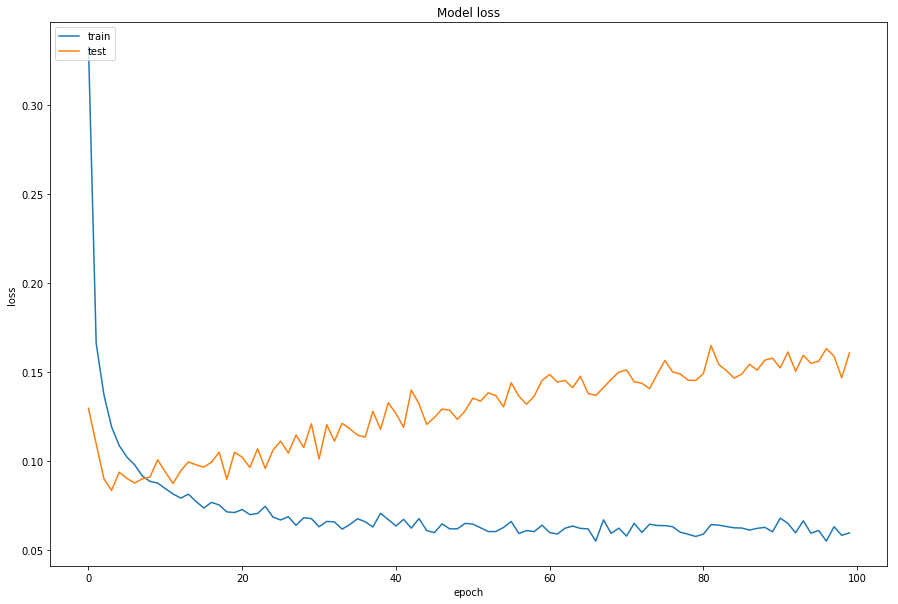

In [29]:
plt.figure(figsize=(15,10))
plt.plot(historyRMS.history['loss'])
plt.plot(historyRMS.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

historySGD = model.fit(input_train, target_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(input_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.0184 - acc: 0.9966 - val_loss: 0.1345 - val_acc: 0.9844
Epoch 2/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.0215 - acc: 0.9961 - val_loss: 0.1353 - val_acc: 0.9846
Epoch 3/100
60000/60000 [==============================] - 9s 154us/step - loss: 0.0197 - acc: 0.9967 - val_loss: 0.1354 - val_acc: 0.9847
Epoch 4/100
60000/60000 [==============================] - 9s 151us/step - loss: 0.0204 - acc: 0.9965 - val_loss: 0.1327 - val_acc: 0.9841
Epoch 5/100
60000/60000 [==============================] - 9s 152us/step - loss: 0.0225 - acc: 0.9965 - val_loss: 0.1335 - val_acc: 0.9844
Epoch 6/100
60000/60000 [==============================] - 9s 154us/step - loss: 0.0186 - acc: 0.9965 - val_loss: 0.1333 - val_acc: 0.9841
Epoch 7/100
60000/60000 [==============================] - 9s 155us/step - loss: 0.0191 - acc: 0.9967 - val_loss: 0

In [35]:
score = model.evaluate(input_test, target_test, verbose=1)
print(score)

10000/10000 [==============================] - 1s 83us/step
[0.1311801503871783, 0.9851]


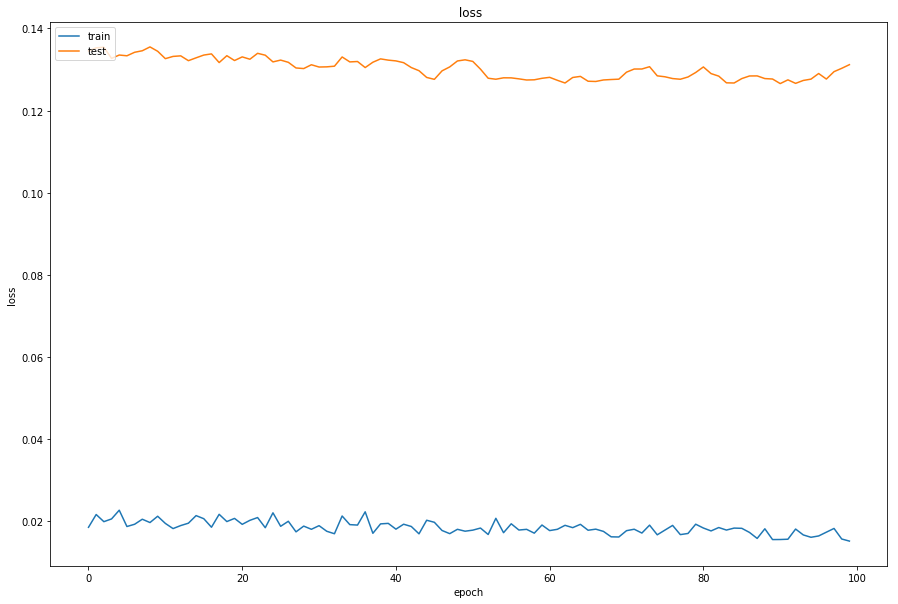

In [36]:
plt.figure(figsize=(15,10))
plt.plot(historySGD.history['loss'])
plt.plot(historySGD.history['val_loss'])
plt.title(' loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

historyAdam = model.fit(input_train, target_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(input_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 14s 237us/step - loss: 0.0612 - acc: 0.9894 - val_loss: 0.1338 - val_acc: 0.9823
Epoch 2/100
60000/60000 [==============================] - 13s 218us/step - loss: 0.0698 - acc: 0.9863 - val_loss: 0.1160 - val_acc: 0.9834
Epoch 3/100
60000/60000 [==============================] - 13s 219us/step - loss: 0.0686 - acc: 0.9859 - val_loss: 0.1197 - val_acc: 0.9819
Epoch 4/100
60000/60000 [==============================] - 13s 220us/step - loss: 0.0699 - acc: 0.9857 - val_loss: 0.1226 - val_acc: 0.9826
Epoch 5/100
60000/60000 [==============================] - 15s 255us/step - loss: 0.0704 - acc: 0.9849 - val_loss: 0.1112 - val_acc: 0.9829
Epoch 6/100
60000/60000 [==============================] - 14s 226us/step - loss: 0.0671 - acc: 0.9856 - val_loss: 0.1262 - val_acc: 0.9821
Epoch 7/100
60000/60000 [==============================] - 14s 230us/step - loss: 0.0690 - acc: 0.9855 - val_l

Epoch 59/100
60000/60000 [==============================] - 12s 194us/step - loss: 0.0356 - acc: 0.9912 - val_loss: 0.0932 - val_acc: 0.9855
Epoch 60/100
60000/60000 [==============================] - 12s 201us/step - loss: 0.0352 - acc: 0.9914 - val_loss: 0.0912 - val_acc: 0.9844
Epoch 61/100
60000/60000 [==============================] - 12s 206us/step - loss: 0.0379 - acc: 0.9907 - val_loss: 0.0929 - val_acc: 0.9847
Epoch 62/100
60000/60000 [==============================] - 12s 193us/step - loss: 0.0342 - acc: 0.9917 - val_loss: 0.0918 - val_acc: 0.9857
Epoch 63/100
60000/60000 [==============================] - 12s 196us/step - loss: 0.0349 - acc: 0.9919 - val_loss: 0.0875 - val_acc: 0.9864
Epoch 64/100
60000/60000 [==============================] - 12s 193us/step - loss: 0.0331 - acc: 0.9915 - val_loss: 0.0963 - val_acc: 0.9844
Epoch 65/100
60000/60000 [==============================] - 12s 196us/step - loss: 0.0323 - acc: 0.9925 - val_loss: 0.0899 - val_acc: 0.9851
Epoch 66/100


In [38]:
score = model.evaluate(input_test, target_test, verbose=1)
print(score)

10000/10000 [==============================] - 1s 107us/step
[0.102145212690365, 0.9842]


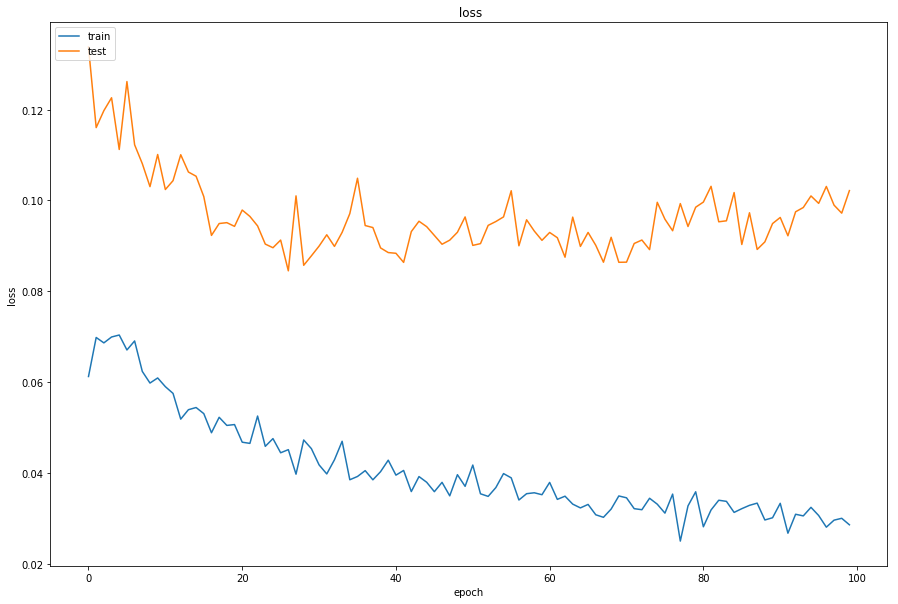

In [41]:
plt.figure(figsize=(15,10))
plt.plot(historyAdam.history['loss'])
plt.plot(historyAdam.history['val_loss'])
plt.title(' loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 172us/step - loss: 0.1059 - acc: 0.9881 - val_loss: 0.1550 - val_acc: 0.9847
Epoch 2/100
60000/60000 [==============================] - 9s 158us/step - loss: 0.1005 - acc: 0.9881 - val_loss: 0.1514 - val_acc: 0.9846
Epoch 3/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.0909 - acc: 0.9894 - val_loss: 0.1502 - val_acc: 0.9849
Epoch 4/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.0865 - acc: 0.9901 - val_loss: 0.1503 - val_acc: 0.9849
Epoch 5/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.0889 - acc: 0.9897 - val_loss: 0.1477 - val_acc: 0.9848
Epoch 6/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.0859 - acc: 0.9895 - val_loss: 0.1463 - val_acc: 0.9848
Epoch 7/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.0795 - acc: 0.9902 - val_lo

Epoch 59/100
60000/60000 [==============================] - 9s 158us/step - loss: 0.0485 - acc: 0.9936 - val_loss: 0.1296 - val_acc: 0.9858
Epoch 60/100
60000/60000 [==============================] - 10s 167us/step - loss: 0.0455 - acc: 0.9939 - val_loss: 0.1274 - val_acc: 0.9856
Epoch 61/100
60000/60000 [==============================] - 8s 137us/step - loss: 0.0485 - acc: 0.9936 - val_loss: 0.1290 - val_acc: 0.9856
Epoch 62/100
60000/60000 [==============================] - 8s 140us/step - loss: 0.0484 - acc: 0.9939 - val_loss: 0.1290 - val_acc: 0.9854
Epoch 63/100
60000/60000 [==============================] - 8s 141us/step - loss: 0.0488 - acc: 0.9932 - val_loss: 0.1283 - val_acc: 0.9855
Epoch 64/100
60000/60000 [==============================] - 8s 140us/step - loss: 0.0487 - acc: 0.9935 - val_loss: 0.1286 - val_acc: 0.9856
Epoch 65/100
60000/60000 [==============================] - 8s 139us/step - loss: 0.0507 - acc: 0.9932 - val_loss: 0.1275 - val_acc: 0.9853
Epoch 66/100
60000/

60000/60000 [==============================] - 9s 147us/step - loss: 0.0491 - acc: 0.9951 - val_loss: 0.1560 - val_acc: 0.9868
Epoch 18/100
60000/60000 [==============================] - 9s 151us/step - loss: 0.0480 - acc: 0.9957 - val_loss: 0.1698 - val_acc: 0.9864
Epoch 19/100
60000/60000 [==============================] - 9s 152us/step - loss: 0.0422 - acc: 0.9959 - val_loss: 0.1665 - val_acc: 0.9854
Epoch 20/100
60000/60000 [==============================] - 9s 151us/step - loss: 0.0406 - acc: 0.9962 - val_loss: 0.1616 - val_acc: 0.9858
Epoch 21/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.0474 - acc: 0.9956 - val_loss: 0.1678 - val_acc: 0.9859
Epoch 22/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.0446 - acc: 0.9958 - val_loss: 0.1678 - val_acc: 0.9858
Epoch 23/100
60000/60000 [==============================] - 9s 151us/step - loss: 0.0424 - acc: 0.9960 - val_loss: 0.1709 - val_acc: 0.9853
Epoch 24/100
60000/60000 [=======

60000/60000 [==============================] - 9s 154us/step - loss: 0.0352 - acc: 0.9970 - val_loss: 0.1807 - val_acc: 0.9860
Epoch 76/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.0316 - acc: 0.9971 - val_loss: 0.1804 - val_acc: 0.9863
Epoch 77/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.0332 - acc: 0.9970 - val_loss: 0.1795 - val_acc: 0.9868
Epoch 78/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.0317 - acc: 0.9972 - val_loss: 0.1703 - val_acc: 0.9873
Epoch 79/100
60000/60000 [==============================] - 9s 154us/step - loss: 0.0333 - acc: 0.9970 - val_loss: 0.1688 - val_acc: 0.9868
Epoch 80/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.0340 - acc: 0.9971 - val_loss: 0.1690 - val_acc: 0.9868
Epoch 81/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.0377 - acc: 0.9967 - val_loss: 0.1706 - val_acc: 0.9863
Epoch 82/100
60000/60000 [=======

60000/60000 [==============================] - 9s 150us/step - loss: 0.0289 - acc: 0.9974 - val_loss: 0.1737 - val_acc: 0.9856
Epoch 34/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.0275 - acc: 0.9976 - val_loss: 0.1747 - val_acc: 0.9857
Epoch 35/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.0252 - acc: 0.9977 - val_loss: 0.1749 - val_acc: 0.9858
Epoch 36/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.0247 - acc: 0.9977 - val_loss: 0.1764 - val_acc: 0.9855
Epoch 37/100
60000/60000 [==============================] - 9s 152us/step - loss: 0.0310 - acc: 0.9972 - val_loss: 0.1779 - val_acc: 0.9858
Epoch 38/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.0207 - acc: 0.9980 - val_loss: 0.1756 - val_acc: 0.9857
Epoch 39/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.0263 - acc: 0.9975 - val_loss: 0.1761 - val_acc: 0.9857
Epoch 40/100
60000/60000 [=======

60000/60000 [==============================] - 14s 233us/step - loss: 0.0213 - acc: 0.9979 - val_loss: 0.1696 - val_acc: 0.9861
Epoch 92/100
60000/60000 [==============================] - 15s 246us/step - loss: 0.0220 - acc: 0.9981 - val_loss: 0.1692 - val_acc: 0.9860
Epoch 93/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0217 - acc: 0.9980 - val_loss: 0.1696 - val_acc: 0.9861
Epoch 94/100
60000/60000 [==============================] - 10s 172us/step - loss: 0.0175 - acc: 0.9982 - val_loss: 0.1707 - val_acc: 0.9862
Epoch 95/100
60000/60000 [==============================] - 11s 187us/step - loss: 0.0218 - acc: 0.9980 - val_loss: 0.1699 - val_acc: 0.9860
Epoch 96/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0204 - acc: 0.9981 - val_loss: 0.1718 - val_acc: 0.9860
Epoch 97/100
60000/60000 [==============================] - 11s 184us/step - loss: 0.0207 - acc: 0.9981 - val_loss: 0.1705 - val_acc: 0.9861
Epoch 98/100
60000/60000 [

Epoch 49/100
60000/60000 [==============================] - 12s 204us/step - loss: 0.0198 - acc: 0.9981 - val_loss: 0.1612 - val_acc: 0.9864
Epoch 50/100
60000/60000 [==============================] - 12s 202us/step - loss: 0.0192 - acc: 0.9980 - val_loss: 0.1627 - val_acc: 0.9865
Epoch 51/100
60000/60000 [==============================] - 12s 203us/step - loss: 0.0199 - acc: 0.9980 - val_loss: 0.1641 - val_acc: 0.9866
Epoch 52/100
60000/60000 [==============================] - 12s 202us/step - loss: 0.0217 - acc: 0.9978 - val_loss: 0.1625 - val_acc: 0.9864
Epoch 53/100
60000/60000 [==============================] - 12s 208us/step - loss: 0.0234 - acc: 0.9978 - val_loss: 0.1610 - val_acc: 0.9866
Epoch 54/100
60000/60000 [==============================] - 12s 207us/step - loss: 0.0235 - acc: 0.9980 - val_loss: 0.1600 - val_acc: 0.9866
Epoch 55/100
60000/60000 [==============================] - 12s 203us/step - loss: 0.0193 - acc: 0.9981 - val_loss: 0.1596 - val_acc: 0.9867
Epoch 56/100


Epoch 7/100
60000/60000 [==============================] - 11s 184us/step - loss: 0.0469 - acc: 0.9955 - val_loss: 0.1666 - val_acc: 0.9858
Epoch 8/100
60000/60000 [==============================] - 11s 186us/step - loss: 0.0525 - acc: 0.9950 - val_loss: 0.1469 - val_acc: 0.9866
Epoch 9/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0485 - acc: 0.9953 - val_loss: 0.1679 - val_acc: 0.9864
Epoch 10/100
60000/60000 [==============================] - 11s 184us/step - loss: 0.0464 - acc: 0.9957 - val_loss: 0.1702 - val_acc: 0.9854
Epoch 11/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.0503 - acc: 0.9951 - val_loss: 0.1690 - val_acc: 0.9861
Epoch 12/100
60000/60000 [==============================] - 11s 187us/step - loss: 0.0552 - acc: 0.9950 - val_loss: 0.1701 - val_acc: 0.9862
Epoch 13/100
60000/60000 [==============================] - 11s 190us/step - loss: 0.0520 - acc: 0.9950 - val_loss: 0.1662 - val_acc: 0.9857
Epoch 14/100
600

60000/60000 [==============================] - 12s 204us/step - loss: 0.0478 - acc: 0.9950 - val_loss: 0.1447 - val_acc: 0.9857
Epoch 66/100
60000/60000 [==============================] - 12s 198us/step - loss: 0.0492 - acc: 0.9950 - val_loss: 0.1598 - val_acc: 0.9844
Epoch 67/100
60000/60000 [==============================] - 12s 195us/step - loss: 0.0457 - acc: 0.9949 - val_loss: 0.1674 - val_acc: 0.9846
Epoch 68/100
60000/60000 [==============================] - 11s 187us/step - loss: 0.0485 - acc: 0.9948 - val_loss: 0.1700 - val_acc: 0.9845
Epoch 69/100
60000/60000 [==============================] - 11s 187us/step - loss: 0.0503 - acc: 0.9947 - val_loss: 0.1590 - val_acc: 0.9849
Epoch 70/100
60000/60000 [==============================] - 12s 198us/step - loss: 0.0515 - acc: 0.9945 - val_loss: 0.1554 - val_acc: 0.9855
Epoch 71/100
60000/60000 [==============================] - 11s 186us/step - loss: 0.0497 - acc: 0.9945 - val_loss: 0.1583 - val_acc: 0.9842
Epoch 72/100
60000/60000 [

Epoch 23/100
60000/60000 [==============================] - 14s 233us/step - loss: 0.0246 - acc: 0.9973 - val_loss: 0.1629 - val_acc: 0.9859
Epoch 24/100
60000/60000 [==============================] - 12s 204us/step - loss: 0.0202 - acc: 0.9978 - val_loss: 0.1625 - val_acc: 0.9858
Epoch 25/100
60000/60000 [==============================] - 17s 280us/step - loss: 0.0224 - acc: 0.9977 - val_loss: 0.1652 - val_acc: 0.9856
Epoch 26/100
60000/60000 [==============================] - 13s 213us/step - loss: 0.0278 - acc: 0.9971 - val_loss: 0.1641 - val_acc: 0.9856
Epoch 27/100
60000/60000 [==============================] - 15s 243us/step - loss: 0.0230 - acc: 0.9978 - val_loss: 0.1632 - val_acc: 0.9857
Epoch 28/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.0213 - acc: 0.9976 - val_loss: 0.1617 - val_acc: 0.9856
Epoch 29/100
60000/60000 [==============================] - 15s 247us/step - loss: 0.0231 - acc: 0.9978 - val_loss: 0.1609 - val_acc: 0.9858
Epoch 30/100


60000/60000 [==============================] - 11s 178us/step - loss: 0.0156 - acc: 0.9981 - val_loss: 0.1600 - val_acc: 0.9856
Epoch 82/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0161 - acc: 0.9983 - val_loss: 0.1599 - val_acc: 0.9857
Epoch 83/100
60000/60000 [==============================] - 11s 182us/step - loss: 0.0168 - acc: 0.9983 - val_loss: 0.1578 - val_acc: 0.9856
Epoch 84/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0171 - acc: 0.9981 - val_loss: 0.1550 - val_acc: 0.9852
Epoch 85/100
60000/60000 [==============================] - 11s 183us/step - loss: 0.0151 - acc: 0.9984 - val_loss: 0.1591 - val_acc: 0.9854
Epoch 86/100
60000/60000 [==============================] - 11s 181us/step - loss: 0.0158 - acc: 0.9980 - val_loss: 0.1590 - val_acc: 0.9852
Epoch 87/100
60000/60000 [==============================] - 11s 181us/step - loss: 0.0198 - acc: 0.9980 - val_loss: 0.1587 - val_acc: 0.9851
Epoch 88/100
60000/60000 [

Epoch 39/100
60000/60000 [==============================] - 12s 198us/step - loss: 0.2402 - acc: 0.9840 - val_loss: 0.2673 - val_acc: 0.9828
Epoch 40/100
60000/60000 [==============================] - 13s 223us/step - loss: 0.2184 - acc: 0.9854 - val_loss: 0.2378 - val_acc: 0.9844
Epoch 41/100
60000/60000 [==============================] - 13s 218us/step - loss: 0.2325 - acc: 0.9847 - val_loss: 0.2580 - val_acc: 0.9831
Epoch 42/100
60000/60000 [==============================] - 13s 212us/step - loss: 0.2411 - acc: 0.9842 - val_loss: 0.2511 - val_acc: 0.9836
Epoch 43/100
60000/60000 [==============================] - 12s 197us/step - loss: 0.2387 - acc: 0.9843 - val_loss: 0.2630 - val_acc: 0.9830
Epoch 44/100
60000/60000 [==============================] - 12s 197us/step - loss: 0.2678 - acc: 0.9820 - val_loss: 0.2613 - val_acc: 0.9831
Epoch 45/100
60000/60000 [==============================] - 12s 196us/step - loss: 0.2673 - acc: 0.9823 - val_loss: 0.2701 - val_acc: 0.9824
Epoch 46/100


60000/60000 [==============================] - 12s 201us/step - loss: 0.3360 - acc: 0.9787 - val_loss: 0.2992 - val_acc: 0.9809
Epoch 98/100
60000/60000 [==============================] - 12s 202us/step - loss: 0.3855 - acc: 0.9755 - val_loss: 0.3114 - val_acc: 0.9803
Epoch 99/100
60000/60000 [==============================] - 12s 203us/step - loss: 0.3952 - acc: 0.9750 - val_loss: 0.3083 - val_acc: 0.9805
Epoch 100/100
60000/60000 [==============================] - 15s 254us/step - loss: 0.3903 - acc: 0.9754 - val_loss: 0.3155 - val_acc: 0.9803


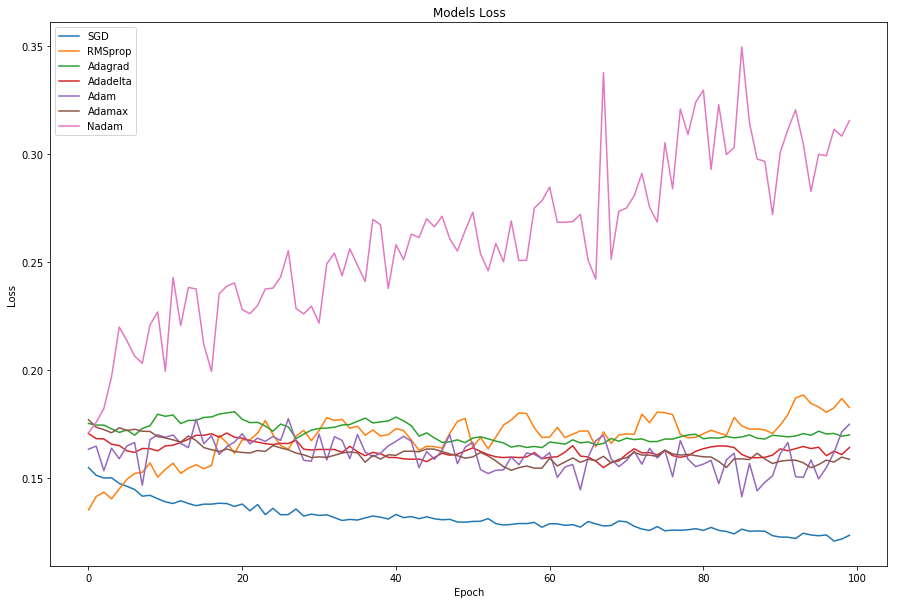

In [13]:
batch_size = 128
epochs = 100
plt.figure(figsize=(15,10))
for optimizer in ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']:
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = model.fit(input_train, target_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose=1,
                        validation_data=(input_test, target_test))
    
    plt.plot(history.history['val_loss'])

plt.title('Models Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], loc='upper left')